# compare RMSD of different periods and sites

In [1]:
import pandas as pd
import numpy as np
import pywt
import wavefuncs as wave
import plotter as p

from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from numpy.polynomial import Polynomial as P
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# global plotting settings
plt.style.use('ggplot')
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1') 

## Import data and process

In [3]:
df = wave.pd_read_from_drive('FLX_JP-BBY') # read from google drive into pd.DataFrame

In [4]:
df = df.replace(-9999, np.nan) # replace missing with nan
df['date'] = pd.to_datetime(df['TIMESTAMP_START'], format='%Y%m%d%H%M') # parse timestamp to new column 'date'
df = df.set_index(df['date'])

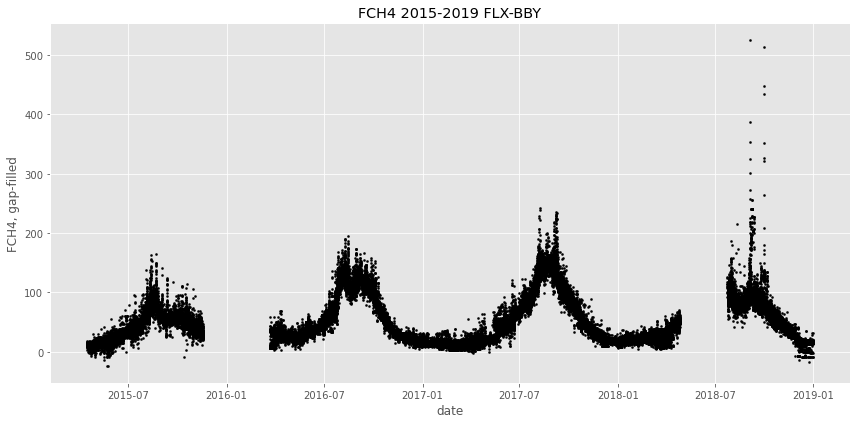

In [5]:
p.date(df.index, df['FCH4_F'], xlabel='date', ylabel='FCH4, gap-filled', title="FCH4 2015-2019 FLX-BBY")

In [6]:
dates = [pd.date_range(start, stop, freq='30min') for [start, stop] in [['2015-01', '2015-07'], 
                                                                        ['2015-07', '2016-01'], 
                                                                        ['2016-01', '2016-07'], 
                                                                        ['2016-07', '2017-01'], 
                                                                        ['2017-01', '2017-07'], 
                                                                        ['2017-07', '2018-01'], 
                                                                        ['2018-01', '2018-07'], 
                                                                        ['2018-07', '2018-12-30']]]

In [7]:
idates = [df.loc[date, 'FCH4_F'].notna().index for date in dates]

In [8]:
for idate in idates:
    dfw = df.loc[idate, :]
    dfw = dfw.loc[dfw['FCH4'].first_valid_index():dfw['FCH4'].last_valid_index()]
    
    dfp = wave.wave(dfw) # process to new df
    df.loc[dfw.index, 'rmsd'] = dfp.loc[:, 'rmsd'] # write back to df
    

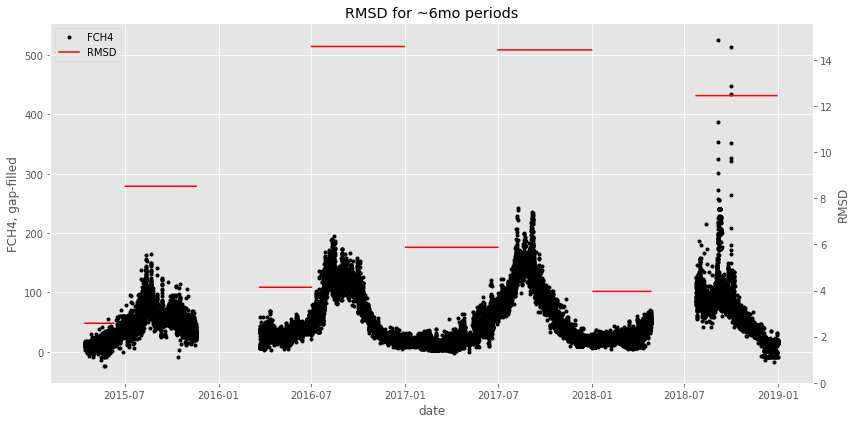

In [35]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(df.index, df.loc[:, 'FCH4_F'], 'k.', label='FCH4')
ax.set(xlabel = 'date', ylabel = 'FCH4, gap-filled', title = 'RMSD for ~6mo periods')

axr = ax.twinx()
axr.grid(False)
axr.yaxis.set_label_position('right')
axr.yaxis.tick_right()
axr.plot(df.index, df.loc[:, 'rmsd'], 'r-', label='RMSD')
axr.set_ylim([0, df.loc[:, 'rmsd'].max() + 1])
axr.set_ylabel('RMSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
linesr, labelsr = axr.get_legend_handles_labels()
ax.legend(lines + linesr, labels + labelsr, loc=2)

plt.tight_layout()
# plt.savefig('plot/20210709_rmsd_vs_date.jpeg')